# Rocket Dynamics

We are interested in modelling the dynamics of a water rocket travelling horizontally along a track.



In [ ]:
using PyPlot

## Parameters

In [186]:
dt = 0.001 # timestep, s
N = 3000 #  number of steps
m0 = 0.500 # empty mass, kg
A = 7.0e-3 # silhouette area, m^2
Cd = 1.0 # drag coefficient
rho_a = 1.2 # air density kg/m^3
P_a = 1e5 # air pressure, N/m^2
rho_w = 1000.0 # water density, kg/m^3
V_t = 6.0e-4 # tank volume, m^3
f = 0.3 # fill fraction
D_n = 6e-3 # nozzle diameter, m
P_l = 3e5 # launch pressure, N/m^2
D_t = 6.7e-2 # tank diameter, m
mu = 5e-2 # rolling friction
g = 9.81 # acceleration due to gravity, m/s^2
gamma = 1.4 # ratio of heat capacities Cp/Cv

1.4

## Numerical integration of the differential equation

We discriteze time in small steps $\Delta t$ and compute: 
  1. the pressure in the tank $P_t$ from adiabatic gas expansion law ($pV^\gamma =$ constant)
  2. the exhaust velocity $v_e$, from Bernoulli's equation and conservation of the volume rate of flow ($A_1 v_1 = A_2 v_2$)
  3. volume flow rate $dV/dt = v_e A_n$ where $A_n$ is the nozzle area
  3. mass flow rate $dm/dt = \rho_w dV/dt$ where $\rho_w$ is the density of water
  4. remaining total mass, and volumes of water and air
  5. forward thrust force due to ejection of fuel $F_t = v_e dm/dt$
  6. drag force $F_d = \frac{1}{2}C_d\rho_a*v^2$
  7. frictional rolling resistance $F_r = \mu mg$

Finally, we update the acceleration, velocity and position using the total force $F = F_t - F_d - F_r$

In [187]:
function run_model()
    
t = [0:dt:N*dt]
x = zeros(N+1)
v = zeros(N+1)
a = zeros(N+1)

P_t = zeros(N+1)
P_t[1] = P_l
v_e = zeros(N+1)

A_n = pi*(D_n/2)^2 # nozzle area, m^2
A_t = pi*(D_t/2)^2 # tank area, m^2
area_ratio = A_n/A_t
V_w = f*V_t
V_a = (1-f)*V_t

for n = 1:N
    # Verlet integration of the positions
    x[n+1] = x[n] + v[n]*dt + 0.5*a[n]*dt^2

    # pressure in the tank, from adiabatic gas expansion
    if V_w <= 0.0
        P_t[n+1] = P_a
    else
        P_t[n+1] = P_l*(V_t*(1-f)/V_a^gamma)
    end
    
    # exhaust velocity, from Bernoulli
    v_e[n+1] = sqrt((P_t[n+1] - P_a)/(rho_w*(1 - area_ratio^2)))
    dV_dt = v_e[n+1]*A_n
    dm_dt = dV_dt*rho_w

    # update volumes of water and air in tank
    V_w = V_w - dV_dt*dt
    V_a = V_t - V_w
    
    m = m0 + V_w*rho_w # remaining total mass
    
    F_thrust = v_e[n+1]*dm_dt
    F_drag = 0.5*A*Cd*rho_a*v[n]^2*sign(v[n])
    F_friction = mu*m*g
    F_total = F_thrust - F_drag - F_friction

    # acceleration = force/massa
    a[n+1] = F_total/m
        
    # update velocities with Verlet algorithm
    v[n+1] = v[n] + (a[n+1] + a[n])/2*dt
end

subplot(515)
plot(t,x)
xlim(0,N*dt)
xlabel(L"$t$ / s")
ylabel(L"$x$ / m")

subplot(514)
plot(t,v)
ylabel(L"$v$ / m/s")
xlim(0,N*dt)

subplot(513)
plot(t,a)
ylabel(L"$a$ / m/s$^2$")
xlim(0,N*dt)
    
subplot(512)
plot(t,v_e)
ylabel(L"$v_e$ / m/s")
xlim(0,N*dt)    

subplot(511)
plot(t,P_t/1e5)
ylabel("P / bar")
xlim(0,N*dt)
    
end

run_model (generic function with 1 method)

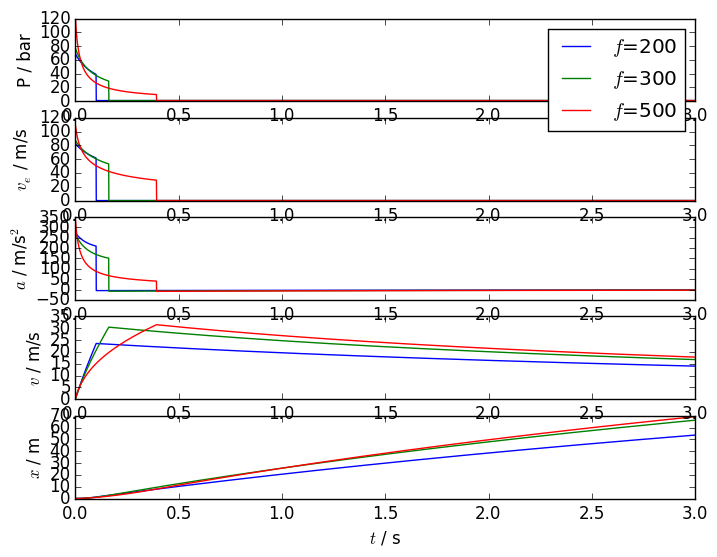

PyObject <matplotlib.legend.Legend object at 0x12b98d110>

In [188]:
f = 200/600
run_model()
f = 300/600
run_model()
f = 500/600
run_model()
legend([L"$f$=200"; L"$f$=300"; L"$f$=500"])

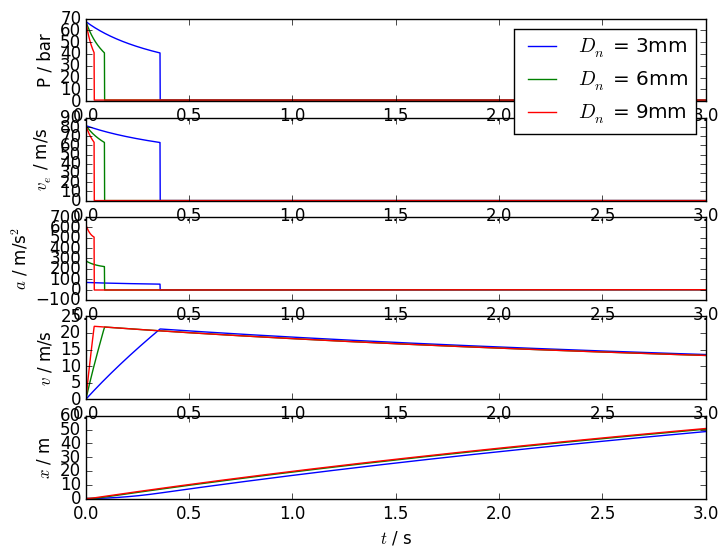

PyObject <matplotlib.legend.Legend object at 0x12bd1a810>

In [189]:
f = 0.3 # back to original 30% filling
D_n = 3e-3
run_model()
D_n = 6e-3
run_model()
D_n = 9e-3
run_model()
legend([L"$D_n$ = 3mm"; L"$D_n$ = 6mm"; L"$D_n$ = 9mm"])

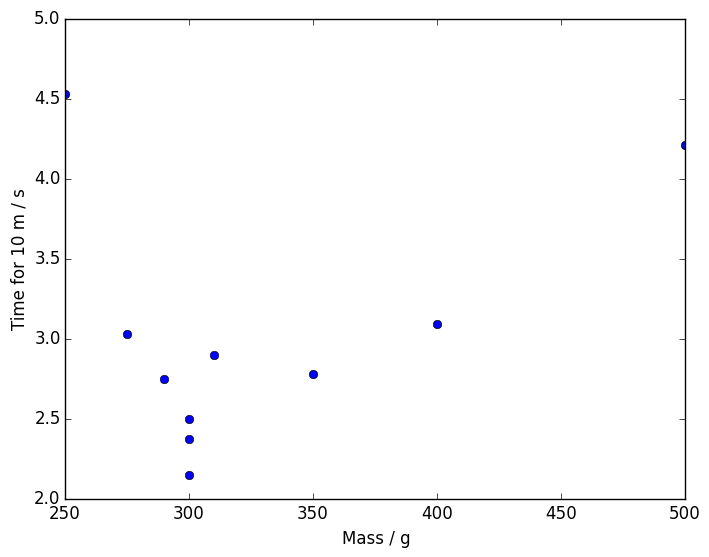

PyObject <matplotlib.text.Text object at 0x12bf30ad0>

In [190]:
# nozzle 6 mm
mass = [500, 300, 250, 350, 400, 300, 275,310,290,300]
time = [4.21, 2.15, 4.53, 2.78, 3.09, 2.37, 3.03, 2.90, 2.75, 2.50]
plot(mass, time, "o")
xlabel("Mass / g")
ylabel("Time for 10 m / s")